In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

! kaggle datasets download --unzip lantian773030/pokemonclassification
! mkdir pokemonDataSplit
! pip install split-folders

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
!rm -r pokemonDataSplit
!mkdir pokemonDataSplit
!pip install split-folders
import split_folders
split_folders.ratio('/content/PokemonData', output='/content/pokemonDataSplit',seed=8205, ratio=(0.9, 0.09, 0.01))

Copying files: 0 files [00:00, ? files/s]

FileNotFoundError: ignored

In [ ]:
!unzip '/content/drive/My Drive/Colab Notebooks/APS360/new pokemon dataset.zip' -d '/root/dataset'

In [ ]:
!pip install split-folders
import split_folders
split_folders.ratio('/root/dataset/PokemonData', output='/root/dataset/PokemonData',seed=1337, ratio=(0.8, 0.1, 0.1))


Copying files: 0 files [00:00, ? files/s]
Copying files: 353 files [00:00, 3526.37 files/s]
Copying files: 813 files [00:00, 3791.67 files/s]
Copying files: 1231 files [00:00, 3879.94 files/s]
Copying files: 1503 files [00:00, 3240.78 files/s]
Copying files: 1928 files [00:00, 3488.41 files/s]
Copying files: 2238 files [00:00, 3312.69 files/s]
Copying files: 2544 files [00:00, 2374.45 files/s]
Copying files: 2801 files [00:01, 2028.50 files/s]
Copying files: 3066 files [00:01, 2175.15 files/s]
Copying files: 3341 files [00:01, 2320.18 files/s]
Copying files: 3670 files [00:01, 2544.82 files/s]
Copying files: 4054 files [00:01, 2828.22 files/s]
Copying files: 4360 files [00:01, 2259.53 files/s]
Copying files: 4666 files [00:01, 2450.60 files/s]
Copying files: 4940 files [00:01, 2494.54 files/s]
Copying files: 5210 files [00:01, 2482.89 files/s]
Copying files: 5473 files [00:02, 2518.04 files/s]
Copying files: 5803 files [00:02, 2704.17 files/s]
Copying files: 6159 files [00:02, 2913.28

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data.sampler import SubsetRandomSampler

import matplotlib.pyplot as plt # for plotting
import torch.optim as optim #for gradient descent
import numpy as np
import time

torch.manual_seed(1) # set the random seed

# obtain data
from torchvision import datasets, transforms

import torchvision.models
alexnet = torchvision.models.alexnet(pretrained=True)

import os

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-4df8aa71.pth


In [ ]:
transform  = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# train_path = 'PokemonData'
# datas = datasets.ImageFolder(train_path, transform)

classes = []
for root, dirs, files in os.walk("/root/dataset/PokemonData/test"):
    for dir in dirs:
        classes.append(dir)
classes.sort()
len(classes)

150

In [ ]:
def get_model_path(path="/content/drive/My Drive/Colab Notebooks/APS360", batch_size=256, learning_rate=0.005, epoch=30):
    path = "{}/poke7k_bs{}_lr{}_epoch{}".format(path,
            batch_size, learning_rate, epoch)
    return path

model_path = get_model_path(path="/content/drive/My Drive/Colab Notebooks/APS360", batch_size=256, learning_rate=0.005, epoch=30)

def train(model, train_loader, val_loader, batch_size=64, num_epochs=1, learning_rate=0.01, save_data_path="", weight_decay=0):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, weight_decay=weight_decay)

    iters, losses, train_acc, val_acc = [], [], [], []
    bss, lrs, times = [], [], []

    # training
    n = 0 # the number of iterations
    start_epoch = 0 
    end_epoch = num_epochs

    if save_data_path != "":
      save_data = torch.load(save_data_path)
      start_epoch = save_data["epoch"]+1
      end_epoch = start_epoch + num_epochs
      iters = save_data["iters"]
      n = iters[-1]+1
      print("n = {}".format(n))
      losses = save_data["losses"]
      train_acc = save_data["train_acc"]
      val_acc = save_data["val_acc"]
      model.load_state_dict(save_data["state"])
      bss = save_data["bss"]
      lrs = save_data["lrs"]
      times = save_data["times"]

    start_time = last_time = time.time()    

    for epoch in range(start_epoch, end_epoch):
        for imgs, labels in iter(train_loader):
              
            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()
            #############################################

            out = model(imgs)             # forward pass

            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch
            
            # save the current training information
            iters.append(n)
            losses.append(float(loss)/batch_size)             # compute *average* loss
            train_acc.append(get_accuracy(model, train_loader)) # compute training accuracy 
            val_acc.append(get_accuracy(model, val_loader))   # compute validation accuracy
            
            n += 1
        
        bss.append(batch_size)                            
        lrs.append(learning_rate)     
        times.append(time.time()-last_time)      
        last_time=time.time() 
        model_path = get_model_path(epoch=epoch+1,batch_size=batch_size,learning_rate=learning_rate)
        save_data = {"epoch":epoch,
                        "iters":iters,
                        "losses":losses,
                        "train_acc":train_acc,
                        "val_acc":val_acc,
                        "times":time.time()-start_time,
                        "state":model.state_dict(),
                        "bss":bss,
                        "lrs":lrs,
                        "times":times}
        torch.save(save_data, model_path)
        end_time = time.time()
        elapsed_time = end_time - start_time
        print("Epoch %d; Loss %f; Train Acc %f; Val Acc %f; Time %f;" % (epoch+1, loss, train_acc[-1], val_acc[-1], sum(times)))

    end_time = time.time()
    elapsed_time = end_time - start_time

    # plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))
    print("Total time elapsed: {:.2f} seconds".format(sum(times)))

n = 720


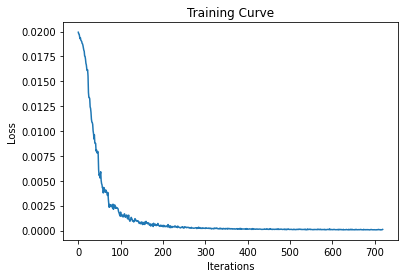

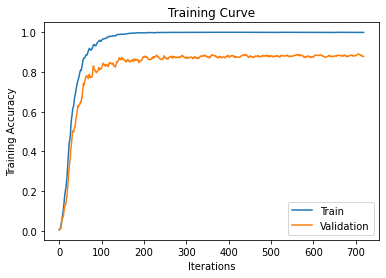

Final Training Accuracy: 0.998533724340176
Final Validation Accuracy: 0.8776508972267537
Total time elapsed: 7181.26 seconds


In [ ]:
#read model

class AlexClassifier(nn.Module):
    def __init__(self):
        super(AlexClassifier, self).__init__()
        self.name = "AlexNet"
        self.fc1 = nn.Linear(256 * 6 * 6, 450)
        self.fc2 = nn.Linear(450, 150)

    def forward(self, x):
        x = x.view(-1, 256 * 6 * 6) #flatten feature data
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = AlexClassifier()
train(model,0,0,256,0,0.005,model_path)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#Take in and resize images
#datas = datasets.ImageFolder('drive/My Drive/DemoImages',transform)
transform  = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    #transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
test_path = '/root/dataset/PokemonData/test/'  
datas = datasets.ImageFolder(test_path,transform)
#test_path = 'root/dataset/PokemonData/test'
test_data = torch.utils.data.DataLoader(datas, batch_size=1, num_workers=1, shuffle=True)
y_true, y_pred = [], []

for img, label in test_data:
  #show the test images
  y_true.append(classes[label.item()])

  img_test=img
  img_test=img_test.squeeze(0)
  img_test=img_test.numpy()
  plt.imshow(np.transpose(img_test, (1,2,0)))
  plt.show()
  
  #classify and print guesses
  feature = alexnet.features(img)
  feature = torch.from_numpy(feature.detach().numpy())
  feature = feature.squeeze(0)

  output = model(feature)
  pred = output.max(1, keepdim=True)[1]
  y_pred.append(classes[pred.item()]) 
  if label==pred: 
    print(classes[label])
  else:  
    print("correct:"+classes[label]+", predict:"+classes[pred])

In [ ]:
print(len(y_true))
print(y_true)
print(y_pred)
n = 0
for i in range(len(y_true)):
  if y_true[i]==y_pred[i] : n=n+1
print(n)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# y_true=['pidgeotto','poliwhirl','venusaur','wigglytuff','ditto','pidgeotto','poliwhirl','venusaur','wigglytuff','ditto','a','b','c','d','e','f','g','h','i']
# y_pred=['pidgeotto','poliwhirl','venusaur','pidgeotto','poliwhirl','venusaur','wigglytuff','ditto','wigglytuff','ditto']
a=confusion_matrix(y_true,y_pred)
print(classification_report(y_true, y_pred))


814
['Dragonair', 'Shellder', 'Dugtrio', 'Tangela', 'Cubone', 'Geodude', 'Primeape', 'Eevee', 'Kingler', 'Venusaur', 'Wartortle', 'Wigglytuff', 'Gloom', 'Bellsprout', 'Venonat', 'Onix', 'Beedrill', 'Kabutops', 'Squirtle', 'Bulbasaur', 'Poliwag', 'MrMime', 'Pikachu', 'Magmar', 'Meowth', 'Kabutops', 'Magnemite', 'Spearow', 'Pidgey', 'Kangaskhan', 'Flareon', 'Kakuna', 'Wigglytuff', 'Mewtwo', 'Vaporeon', 'Seaking', 'Clefable', 'Tangela', 'Nidoqueen', 'Moltres', 'Kabuto', 'Flareon', 'Venomoth', 'Farfetchd', 'Lickitung', 'Tentacruel', 'Golduck', 'Kabutops', 'Shellder', 'Charmander', 'Seel', 'Hitmonchan', 'Gyarados', 'Dodrio', 'Golem', 'Persian', 'Goldeen', 'Blastoise', 'Psyduck', 'Scyther', 'Wigglytuff', 'Sandshrew', 'Doduo', 'Charmeleon', 'Haunter', 'Hitmonchan', 'Paras', 'Koffing', 'Electrode', 'Dugtrio', 'Graveler', 'Magikarp', 'Onix', 'Pidgey', 'Ekans', 'Hitmonchan', 'Magneton', 'Clefairy', 'Golbat', 'Wartortle', 'Grimer', 'Clefairy', 'Machoke', 'Weedle', 'Weepinbell', 'Cloyster', 'Venon

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
true=['pidgeotto','poliwhirl','venusaur','wigglytuff','ditto','pidgeotto','poliwhirl','venusaur','wigglytuff','ditto','a','a','z','z','z']
pred=['pidgeotto','poliwhirl','venusaur','pidgeotto','poliwhirl','venusaur','wigglytuff','ditto','wigglytuff','z','z','a','z','z','z']
print(classification_report(true,pred))


              precision    recall  f1-score   support

           a       1.00      0.50      0.67         2
       ditto       0.00      0.00      0.00         2
   pidgeotto       0.50      0.50      0.50         2
   poliwhirl       0.50      0.50      0.50         2
    venusaur       0.50      0.50      0.50         2
  wigglytuff       0.50      0.50      0.50         2
           z       0.60      1.00      0.75         3

    accuracy                           0.53        15
   macro avg       0.51      0.50      0.49        15
weighted avg       0.52      0.53      0.51        15



In [ ]:
"""
import random
y_pred=[]
for i in range(150):
  y_pred.append(str(i))

y_true=random.sample(y_pred,len(y_pred))
print(y_pred)
"""

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149']
['124', '48', '118', '60', '68', '7', '95', '31', '70', '10

In [ ]:
"""from sklearn.metrics import confusion_matrix
# y_true=['pidgeotto','poliwhirl','venusaur','wigglytuff','ditto','pidgeotto','poliwhirl','venusaur','wigglytuff','ditto','a','b','c','d','e','f','g','h','i']
# y_pred=['pidgeotto','poliwhirl','venusaur','pidgeotto','poliwhirl','venusaur','wigglytuff','ditto','wigglytuff','ditto']
a=confusion_matrix(y_true,y_pred)
a[0:10,0:10]
"""

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])